## Лабораторная работа №4. Оценка качества моделей машинного обучения.
### Часть 3. Задача регрессии.

Используемый набор данных: [Airfoil Self-Noise](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise)

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import os
import requests

%matplotlib inline

pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291"
downloadFile(url + "/airfoil_self_noise.dat", "dataset/airfoil_self_noise.dat")

In [3]:
headers = ["Frequency", "Angle", "Chord length", "Free-stream velocity", "Suction side displacement thickness",
           "Scaled sound pressure level"]  
data = pd.read_csv("dataset/airfoil_self_noise.dat", names=headers, sep="\t")
data.sample(40)

,Frequency,Angle,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
145,630,3.0,0.3048,31.7,0.005295,128.698
943,1600,19.7,0.0508,71.3,0.034118,120.575
697,500,12.6,0.1524,71.3,0.048316,121.664
475,2500,0.0,0.1524,55.5,0.001727,127.763
1084,400,9.5,0.0254,39.6,0.004498,121.154
1075,2000,9.5,0.0254,55.5,0.004328,134.052
928,2000,15.4,0.0508,31.7,0.028985,120.835
488,1250,0.0,0.1524,39.6,0.001933,131.023
1487,200,15.6,0.1016,39.6,0.052849,123.514
109,6300,3.0,0.3048,71.3,0.004257,116.134


In [4]:
display(data.isna().sum())
display(data.describe())

Frequency                              0
Angle                                  0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

,Frequency,Angle,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


Пропусков в данных нет.

Подготовим данные и обучим модель.

In [5]:
y = data["Scaled sound pressure level"].copy()
X = data.drop(columns=["Scaled sound pressure level"]).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=25)
y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)

Выполним подсчет RMSE и коэффициента детерминации.

In [6]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("RMSE = {0:0.3f}\nr2 = {1:0.3f}".format(RMSE, r2))

RMSE = 4.838
r2 = 0.498


Диаграмма рассеяния для построенной модели.

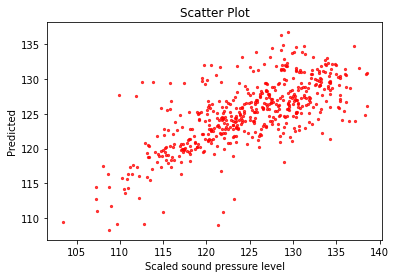

In [7]:
_, ax = plt.subplots()
ax.scatter(y_test, y_pred, s = 5, color = "r", alpha = 0.75)
ax.set_title("Scatter Plot")
ax.set_xlabel("Scaled sound pressure level")
ax.set_ylabel("Predicted")
display()